# Постановка задачи классификации

**Классификация** — один из разделов машинного обучения, посвященный решению следующей задачи. Имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся. Это множество называется обучающей выборкой. Классовая принадлежность остальных объектов не известна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества.

## Формальная постановка

Пусть $X$ — множество описаний объектов, 
$Y$ — конечное множество номеров (имён, меток) классов. 
Существует неизвестная *целевая зависимость* — отображение
$y^{*}:\; X\to Y$,
значения которой известны только на объектах конечной обучающей выборки
$X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}$.
Требуется построить алгоритм $a:\; X\to Y$,
способный классифицировать произвольный объект
$x \in X$. 

## Типы признаков

* **бинарный**: $D_j$ = $\{0, 1\}$;
* вещественный: $D_j$ из $\{R\}$;
* **категориальный**: $D_j$ -- конечное неупорядоченное множество;
* **порядковый**: $D_j$ --  конечное упорядоченное множество;
* ***множествозначный***: $D_j$ -- подмножество некоторого множества.

В качестве целевого признака в задаче классификации обычно выступают: бинарный, категориальный, порядковый

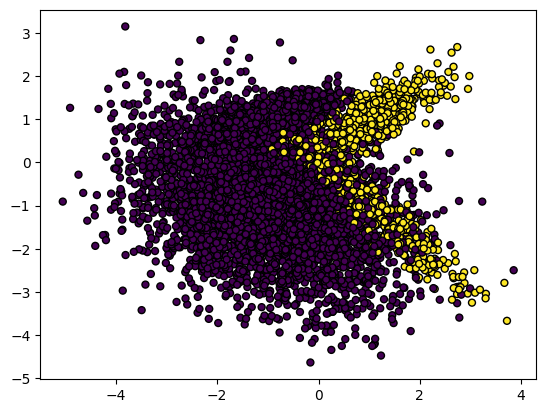

In [93]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


X_binary, y_binary = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.9, 0.1], flip_y=0, random_state=42)

plt.scatter(X_binary[:, 0], X_binary[:, 1], marker="o", c=y_binary, s=25, edgecolor="k")
plt.show()

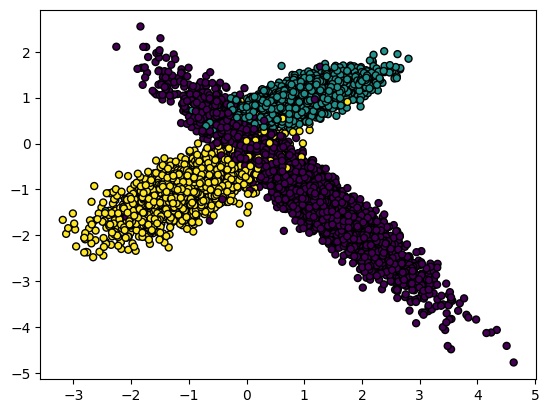

In [3]:
X_multi, y_multi = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, weights=[0.4, 0.4, 0.2], n_classes=3, random_state=42)

plt.scatter(X_multi[:, 0], X_multi[:, 1], marker="o", c=y_multi, s=25, edgecolor="k")
plt.show()

# Гипотеза компактности

Метрические классификаторы опираются на гипотезу компактности, которая предполагает, что схожие объекты чаще лежат в одном классе, чем в разных. Это означает, что граница между классами имеет достаточно простую форму, и классы образуют компактно локализованные области в пространстве объектов. 

# Метод k-ближайших соседей
kNN, k-nearest neighbors

Простейший метрический классификатор, основанный на оценивании сходства объектов. Классифицируемый объект относится к тому классу, которому принадлежат ближайшие к нему объекты обучающей выборки.

Варианты:

$n$ -- количество классов, $k$ -- количество соседей
* Метод ближайшего соседа: $n$ -- любое, $k=1$. Классифицируемый объект относится к тому классу, которому принадлежит ближайший объект обучающей выборки.
* Метод k ближайших соседей: $n$ -- любое, $k$ -- любое. При $n = 2$ берут нечётное количество соседей, чтобы не возникало ситуаций неоднозначности.
* Метод взвешенных ближайших соседей: $n$ -- любое, $k$ -- любое. При $n \geq 3$ может возникать неоднозначность. Тогда $i$-му соседу приписывается вес $w_i$, как правило, убывающий с ростом ранга соседа $i$. Объект относится к тому классу, который набирает больший суммарный вес среди $k$ ближайших соседей.


## Обучение (fit)
В самом простом варианте стадии обучения как таковой нет. Она заключается в сохранении обучающей выборки внутри модели.
Если выборка очень большая, то на стадии обучения проблему решают двумя способами:
* прореживание
* построение k-d-дерева

## Предсказание (predict)
Состоит из следующих этапов:
1. На основе функции расстояния (метрики) осортировать объекты по удалённости от классифицируемого;
2. Выбрать $k$ ближайших объектов из отсортированной обучающей выборки;
3. Оценить принадлежность по этим $k$ объектам.

In [94]:
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # метрику влепить
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.predict([[-3, -3]])

In [ ]:
knn.predict([[3, 3]])

In [95]:
y_bin_knn_pred = knn.predict(X_test)

# Метрики качества



## Accuracy

accuracy = (количество верно классифицированных объектов) / (общее количество объектов)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

from sklearn.metrics import accuracy_score


accuracy_score(y_test, y_bin_knn_pred)

## Confusion matrix

![](https://www.bigdataschool.ru/wp-content/uploads/2020/01/%D0%BF%D1%80%D0%BE%D0%B3_2.png)

In [97]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_bin_knn_pred)

array([[2906,   73],
       [  85,  236]], dtype=int64)

## Precision, Recall, F-мера

* $P$ – число истинных результатов, $P = TP + FN$
* $N$ – число ложных результатов, $N = TN + FP.$ 


![](https://www.bigdataschool.ru/wp-content/uploads/2020/01/%D0%BF%D1%80%D0%BE%D0%B3_3.png)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report


print(classification_report(y_test, y_bin_knn_pred))

## ROC AUC score

Полное название ROC — Receiver Operating Characteristic (рабочая характеристика приёмника). Впервые она была создана для использования радиолокационного обнаружения сигналов во время Второй мировой войны. США использовали ROC для повышения точности обнаружения японских самолетов с помощью радара. Поэтому ее называют рабочей характеристикой приемника.

AUC или area under curve — это просто площадь под кривой ROC. 

True Positive Rate (TPR) показывает, какой процент среди всех positive верно предсказан моделью.

$TPR = \frac{TP}{TP + FN}$

False Positive Rate (FPR): какой процент среди всех negative неверно предсказан моделью.

$FPR = \frac{FP}{TP + FN}$

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve


plot_roc_curve(knn, X_test, y_test)

# Байесовский классификатор




## Формула Байеса

Формула Байеса позволяет «переставить причину и следствие»: по известному факту события вычислить вероятность того, что оно было вызвано данной причиной. События, отражающие действие «причин», в данном случае называют гипотезами, так как они — предполагаемые события, повлекшие данное.

$P(A|B) =\frac{P(A) \cdot P(B | A)}{P(B)}$ (1)

* $P(A)$  -- априорная вероятность гипотезы A;
* $P(A|B)$ --  вероятность гипотезы A при наступлении события B (апостериорная вероятность);
* $P(B|A)$ --  вероятность наступления события B при истинности гипотезы A;
* $P(B)$ -- полная вероятность наступления события B.

## Случай с одним признаком

Для классифкации на основе одного признака формулу (1) мы можем переписать следующим образом (2):

$P(class|feature) =\frac{P(class) \cdot P(feature | class)}{P(feature)}$ (2)

Различие между теоремой Байеса и наивным классификатором Байеса состоит в том, что наивный классификатор предполагает условную независимость, тогда как теорема Байеса ее не предполагает. Это означает, что между всеми входными свойствами классификатора нет взаимозависимости. 

Возможно это не очень удачное предположение, но именно поэтому этот алгоритм называют «наивным» (naive). В этом также одна из причин ускоренной работы алгоритма. Несмотря на то, что алгоритм «наивен», он все же может превзойти сложные модели. Поэтому не позволяйте названию вводить вас в заблуждение. 

## Случай с несколькими дискретными признаками


В теореме Байеса вы должны вычислить единую условную вероятность с учетом всех свойств (вверху). С помощью наивного классификатора Байеса мы все упрощаем, вычисляя для каждого свойства условную вероятность, а затем перемножая их. Именно поэтому он и называется «наивным», поскольку условные вероятности всех свойств вычисляются независимо друг от друга.

Теорема Байеса:

$P(class | x_1, x_2, \dots, x_n) = \frac{P(x_1, x_2, \dots, x_n | class) \cdot P(class)}{P(x_1, x_2, \dots, x_n)}$ (5)

Naive Bayes:

$P(class | x_1, x_2, \dots, x_n) = P(x_1|class) \cdot P(x_2|class) \cdot ... \cdot P(x_n|class) \cdot P(class)$ (6)

## Случай с числовыми признаками

Перед построением частотных таблиц числовые переменные можно преобразовать в их категориальные аналоги (разбиение). Другой вариант -- использовать распределение числовой переменной, чтобы иметь представление о её частоте. Например, одна из распространенных практик - предполагать нормальные распределения для числовых переменных.
 
Функция плотности вероятности для нормального распределения определяется двумя параметрами (средним значением и стандартным отклонением).

$\mu = \frac{1}{n}\sum\limits_{i=1}^{n} x_i$ -- среднее

$\sigma = \left[ \frac{1}{n-1} \sum\limits_{i=1}^{n} (x_i - \mu)^2 \right]^{0.5}$ -- стандартное отклонение

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp({-\frac{(x-\mu)^2}{2\sigma^2})}$ -- функция плотности для нормального распределения



Примеры:

https://colab.research.google.com/drive/1wLCswiaoRUWzNzqM9_Gervhmb4jO66nx?usp=sharing

https://colab.research.google.com/drive/1z-3xoT6BzKmmZyycYPpA9EEoJgUlBb2t?usp=sharing

In [ ]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

# Логистическая регрессия

В отличие от обычной регрессии, в методе логистической регрессии не производится предсказание значения числовой переменной исходя из выборки исходных значений. Вместо этого, значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу. 

[Инфо 1](http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F#:~:text=%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F%20(Logistic%20regression)%20%E2%80%94,%D0%B0%D0%BF%D0%BE%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%BE%D1%80%D0%BD%D1%8B%D0%B5%20%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8%20%D0%BF%D1%80%D0%B8%D0%BD%D0%B0%D0%B4%D0%BB%D0%B5%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D0%B8%20%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2%20%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B0%D0%BC.)

[Инфо 2](https://habr.com/ru/company/io/blog/265007/)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# SVM
support vector machine, машина опорных векторов

Основная идея метода — перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с наибольшим зазором в этом пространстве. Две параллельных гиперплоскости строятся по обеим сторонам гиперплоскости, разделяющей классы. Разделяющей гиперплоскостью будет гиперплоскость, создающая наибольшее расстояние до двух параллельных гиперплоскостей. Алгоритм основан на допущении, что чем больше разница или расстояние между этими параллельными гиперплоскостями, тем меньше будет средняя ошибка классификатора.

[инфо 1](http://www.machinelearning.ru/wiki/index.php?title=SVM)

[инфо 2](https://habr.com/ru/company/ods/blog/484148/)

In [ ]:
# https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Работа с дисбалансом классов (imbalanced-learn)

* Down sampling -- удаляем объекты мажоритарного класса
* Upper sampling -- добавляем объекты миноритарного класса (дублирование, SMOTE)

# Масштабирование значений признаков 
* Standart Scaller: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* MinMaxScaller: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html



# Задания



## Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

```
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
```

In [2]:
import pandas as pd
import numpy as np

In [116]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

df = pd.DataFrame(data, columns=['weather', 'walking'])
df

,weather,walking
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


### $P(walking|raining) =\frac{P(walking) \cdot P(raining | walking)}{P(raining)}$

In [117]:
p_walking = len(df.loc[df['walking'] == True]) / len(df)
p_walking

0.5333333333333333

In [118]:
p_raining = len(df.loc[df['weather'] == 'дождь']) / len(df)
p_raining

0.2

In [119]:
p_raining_if_walking = len(df.loc[(df['weather'] == 'дождь') & (df['walking'] == True)]) / len(df.loc[df['walking'] == True])
p_raining_if_walking

0.125

In [120]:
p_walking_if_raining = (p_walking * p_raining_if_walking) / p_raining
p_walking_if_raining

0.3333333333333333

## Задание 2

- загрузите датасет для классификации, проведите предобработку, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- Масштабируйте числовые признаки
- В случае дисбаланса проведите балансировку
- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.
- вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score


In [3]:
data = pd.read_csv('../data/card_transdata.csv')
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
data.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [6]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Up sampling

In [6]:
data["fraud"].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [ ]:
ratio = len(data.loc[data['fraud']==0]) // len(data.loc[data['fraud']==1])
ratio

In [ ]:
df = data.loc[data['fraud']==1]
df = df.loc[df.index.repeat(ratio)]
data = pd.concat([data.loc[data['fraud']==0], df]).sample(frac=1).reset_index(drop=True)

## Down sampling

In [4]:
from sklearn.utils import resample

fraud_0 = data[data['fraud'] == 0]
fraud_1 = data[data['fraud'] == 1]

data_downsample = resample(fraud_0, replace=True, n_samples=len(fraud_1))

print(data_downsample.shape)

(87403, 8)


In [5]:
data = pd.concat([data_downsample, fraud_1]).sample(frac=1).reset_index(drop=True)
print(data["fraud"].value_counts())

0.0    87403
1.0    87403
Name: fraud, dtype: int64


In [6]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,20.211127,0.080074,0.765894,1.0,1.0,0.0,1.0,0.0
1,3.991784,1.063091,0.843780,1.0,0.0,0.0,1.0,0.0
2,16.510867,3.927569,0.174174,1.0,0.0,0.0,0.0,0.0
3,2.000027,0.231883,1.427570,1.0,1.0,0.0,0.0,0.0
4,18.061769,0.623783,4.331394,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
174801,5.912711,0.048860,2.242847,1.0,0.0,0.0,1.0,0.0
174802,6.057480,0.339883,0.467084,1.0,1.0,1.0,1.0,0.0
174803,10.162044,2.566964,0.857462,1.0,1.0,0.0,1.0,0.0
174804,42.822821,0.317691,4.204283,1.0,1.0,0.0,1.0,1.0


In [7]:
data.to_csv('../data/pre_card_transdata.csv')

## Разделение на обучающую и тестовую выборку

In [10]:
y = data["fraud"]
X = data.drop(["fraud"], axis=1)

In [11]:
y.shape

(174806,)

In [12]:
X.shape

(174806, 7)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((139844, 7), (139844,), (34962, 7), (34962,))

## StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## MinMaxScaler

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [160]:
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## KNN без гиперпараметров

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred = knn.predict(X_test_std)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17641
         1.0       1.00      1.00      1.00     17321

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



In [29]:
confusion_matrix(y_test, y_pred)

array([[17562,    79],
       [   15, 17306]], dtype=int64)

In [30]:
roc_auc_score(y_test, y_pred)

0.997327897504148

## KNN с гиперпараметрами¶

In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [32]:
param_grid = {'n_neighbors': np.arange(1, 10, 1)}

In [33]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [34]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [35]:
y_pred = grid_search.best_estimator_.predict(X_test_std)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17641
         1.0       1.00      1.00      1.00     17321

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



In [37]:
confusion_matrix(y_test, y_pred)

array([[17589,    52],
       [   25, 17296]], dtype=int64)

In [38]:
roc_auc_score(y_test, y_pred)

0.9978044933082665

## Native Bayes

Функция плотности вероятности для нормального распределения определяется двумя параметрами (средним значением и стандартным отклонением).

$\mu = \frac{1}{n}\sum\limits_{i=1}^{n} x_i$ -- среднее

$\sigma = \left[ \frac{1}{n-1} \sum\limits_{i=1}^{n} (x_i - \mu)^2 \right]^{0.5}$ -- стандартное отклонение

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp({-\frac{(x-\mu)^2}{2\sigma^2})}$ -- функция плотности для нормального распределения


In [39]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_std, y_train)
y_pred = gnb.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94     17641
         1.0       0.92      0.96      0.94     17321

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962



In [40]:
confusion_matrix(y_test, y_pred)

array([[16131,  1510],
       [  607, 16714]], dtype=int64)

In [41]:
roc_auc_score(y_test, y_pred)

0.9396798896566749

## C гиперпараметрами

In [42]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb = GridSearchCV(estimator=GaussianNB(), param_grid=params, cv=3)
gnb.fit(X_train_std, y_train)
print(gnb.best_params_)

{'var_smoothing': 1e-08}


In [43]:
y_pred = gnb.best_estimator_.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94     17641
         1.0       0.92      0.96      0.94     17321

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962



In [44]:
confusion_matrix(y_test, y_pred)

array([[16130,  1511],
       [  607, 16714]], dtype=int64)

In [45]:
roc_auc_score(y_test, y_pred)

0.9396515465922228

## Логистическая регрессия

In [46]:
from sklearn.linear_model import LogisticRegression

## Без гиперпараметров

In [47]:
lr = LogisticRegression().fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     17641
         1.0       0.91      0.93      0.92     17321

    accuracy                           0.92     34962
   macro avg       0.92      0.92      0.92     34962
weighted avg       0.92      0.92      0.92     34962



In [48]:
confusion_matrix(y_test, y_pred)

array([[15981,  1660],
       [ 1191, 16130]], dtype=int64)

In [49]:
roc_auc_score(y_test, y_pred)

0.91857028092125

## С гиперпараметрами

In [50]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[0.01, 0.05, 0.1, 0.5, 1, 5, 10]}]

In [51]:
grid_search = GridSearchCV(LogisticRegression(), param_grid = parameters, cv = 3)
grid_search.fit(X_train_std, y_train)  

D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Machine_Learning\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueEr

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}])

In [52]:
grid_search.best_params_

{'C': 10}

In [53]:
y_pred = grid_search.best_estimator_.predict(X_test_std)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94     17641
         1.0       0.93      0.94      0.93     17321

    accuracy                           0.93     34962
   macro avg       0.94      0.94      0.93     34962
weighted avg       0.94      0.93      0.93     34962



In [55]:
confusion_matrix(y_test, y_pred)

array([[16368,  1273],
       [ 1001, 16320]], dtype=int64)

In [56]:
roc_auc_score(y_test, y_pred)

0.9350237186499174

## SVM

## Без гиперпараметров

In [57]:
from sklearn import svm

In [58]:
sv = svm.SVC()
sv.fit(X_train_std, y_train)
y_pred = sv.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     17641
         1.0       0.94      0.95      0.95     17321

    accuracy                           0.95     34962
   macro avg       0.95      0.95      0.95     34962
weighted avg       0.95      0.95      0.95     34962



In [59]:
confusion_matrix(y_test, y_pred)

array([[16582,  1059],
       [  780, 16541]], dtype=int64)

In [60]:
roc_auc_score(y_test, y_pred)

0.9474686737302429

## С гиперпараметрами

In [181]:
param_grid = {'C': [0.1, 1, 10, 100]} 
  
grid = GridSearchCV(svm.SVC(), param_grid)
grid.fit(X_train_std, y_train)
print(grid.best_params_)

In [ ]:
y_pred = grid.best_estimator_.predict(X_test_std)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
roc_auc_score(y_test, y_pred)

## Задание 3
* Самостоятельно реализуйте метрики Accuracy, Precision, Recall, F1
* Самостоятельно реализуйте kNN и Naive Bayes

## Реализация метрик

In [61]:
def Confusion_matrix(y_test, y_pred):
    
    y_test = y_test.reset_index(drop=True)
    
    len_class = len(set(y_test))
    size = len(y_test)
    matrix = [[]] * 2

    for class_name in range(len_class):
        matrix[class_name] = [0 for i in range(len_class)]

    for i in range(size):
        test_class = y_test[i].astype(int)
        pred_class = y_pred[i].astype(int)
        matrix[test_class][pred_class] += 1
  
    return matrix


In [63]:
def Accuracy(y_test, y_pred):
    matrix = Confusion_matrix(y_test, y_pred)
    return round((matrix[0][0] + matrix[1][1]) / np.sum(matrix), 2)

In [65]:
def Precision(y_test, y_pred):
    matrix = Confusion_matrix(y_test, y_pred)
    return round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)

In [82]:
def Recall(y_test, y_pred):
    matrix = Confusion_matrix(y_test, y_pred)
    return round(matrix[0][0] / (matrix[0][0] + matrix[1][0]), 2)

In [69]:
def F1_score(y_test, y_pred):
    matrix = Confusion_matrix(y_test, y_pred)
    return round(2 / (1 / Precision(y_test, y_pred) + 1 / Recall(y_test, y_pred)), 2)

## Реализация KNN

In [193]:
class KNN:
    
    def __init__(self, neighbors):
        
        self.neighbors = neighbors
    
    def fit(self, X_train, y_train):
        
        self.X_train = X_train
        self.y_train = y_train
    
    def euclidean_distance(self, x_1, x_2):
        
        return np.sqrt(np.sum((x_1 - x_2)**2))    
    
    def predict(self, X_test):
        
        y_pred = []
        
        for x in X_test:   
        
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
            sort_indexes = np.argsort(distances)
            nearest_indexes = sort_indexes[:self.neighbors]
            y_values = [self.y_train[i] for i in nearest_indexes]
            
            y_pred.append(max(y_values, key=lambda c: y_values.count(c)))
          
        return np.array(y_pred)

In [194]:
class_knn = KNN(1)
class_knn.fit(X_train_std, y_train)

In [ ]:
y_pred_knn = class_knn.predict(X_test_std)

In [ ]:
print(classification_report(y_test, y_pred_knn))

## Реализация Naive Bayes

In [121]:
import math

class NaiveBayes:
    
    def fit(self, X_train, y_train):
        
        self.classes = np.unique(y_train)
        self.classes_kol = len(self.classes)

        self.mean_value = np.zeros((self.classes_kol, X_train.shape[1]))
        self.std_value = np.zeros((self.classes_kol, X_train.shape[1]))
        self.probabilities = np.zeros(self.classes_kol)

        for i, c in enumerate(self.classes):
             
            X_train_class = X_train[y_train == c]
            self.mean_value[i, :] = X_train_class.mean(axis=0)
            self.std_value[i, :] = X_train_class.std(axis=0)
            self.probabilities[i] = X_train_class.shape[0] / X_train.shape[0]
            
    def find_probability(self, class_i, x):                                      #вероятность принадлежности объекта к классу
        
        n = np.exp(-((x - self.mean_value[class_i])**2) / (2 * self.std_value[class_i]**2))
        d = np.sqrt(2 * np.pi) * self.std_value[class_i]
        return n / d

    def predict(self, X_test):
        
        y_pred = []
        
        for x in X_test:
            
            probabilities = []
            
            for i in range(self.classes_kol):
    
                probability = math.prod(self.find_probability(i, x))             #умножение веротяностей отдельных объектов
                probability *= self.probabilities[i]                             #умножение на вероятность класса
                probabilities.append(probability)

            y_pred.append(self.classes[np.argmax(probabilities)])
            
        return np.array(y_pred)

In [122]:
nv =  NaiveBayes()
nv.fit(X_train_std, y_train)

In [123]:
y_pred_nv = nv.predict(X_test_std)

In [126]:
confusion_matrix(y_test, y_pred_nv)

array([[16132,  1509],
       [  608, 16713]], dtype=int64)

In [125]:
print(classification_report(y_test, y_pred_nv))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94     17641
         1.0       0.92      0.96      0.94     17321

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962



In [140]:
Confusion_matrix(y_test, y_pred_nv)

[[16132, 1509], [608, 16713]]

In [132]:
Accuracy(y_test, y_pred_nv)

0.94

In [137]:
Precision(y_test, y_pred_nv)

0.91

In [138]:
Recall(y_test, y_pred_nv)

0.96

In [139]:
F1_score(y_test, y_pred_nv)

0.93

In [136]:
roc_auc_score(y_test, y_pred_nv)

0.9396793660275183

## Дополнительные баллы

* Самостоятельно реализуйте SVM с возможностью выбирать ядро.

In [ ]:
# ваше решение